<a href="https://colab.research.google.com/github/yunnsss/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle API 인증하기**

In [ ]:
# Kaggle API를 사용하여 데이터 다운로드
!pip install kaggle

# Kaggle API 인증 파일 업로드
from google.colab import files
files.upload()

# Kaggle API 인증
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# **타이타닉 데이터셋 전처리 실습**

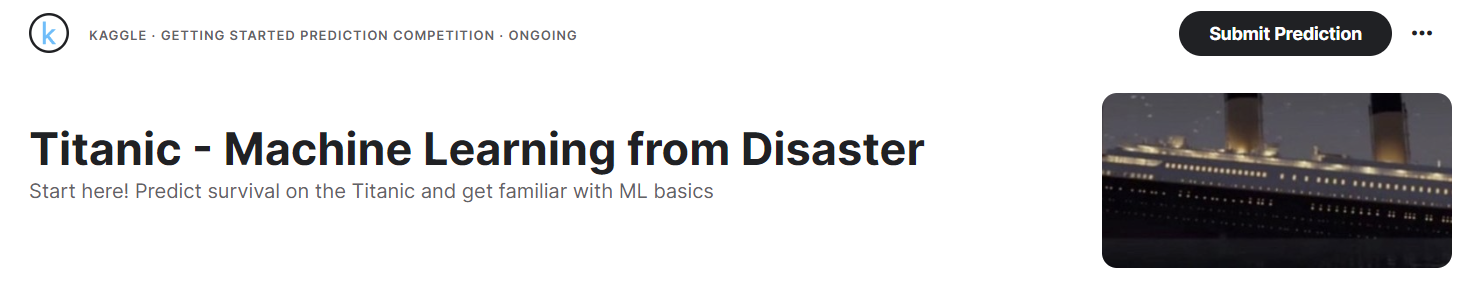

https://www.kaggle.com/competitions/titanic/

In [ ]:
# 타이타닉 데이터셋 다운로드
!kaggle competitions download -c titanic # 느낌표 뒤에 다운로드 코드 붙여넣기 해주면 됨

# 압축 해제
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 40.3MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 0. 데이터 병합

- 머신러닝을 학습할때, train dataset으로 학습 시키고 test dataset으로 평가한다


In [ ]:
import pandas as pd

train_df=pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df=pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# test_df에 Survived 컬럼을 추가하고 NaN 값으로 채움
test_df['Survived'] = None

# 두 데이터프레임을 결합
titanic_df = pd.concat([train_df,test_df], ignore_index=True) # inedx는 무시

# 결과 출력
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 1. 변수 의미 파악하기

https://www.kaggle.com/competitions/titanic/data

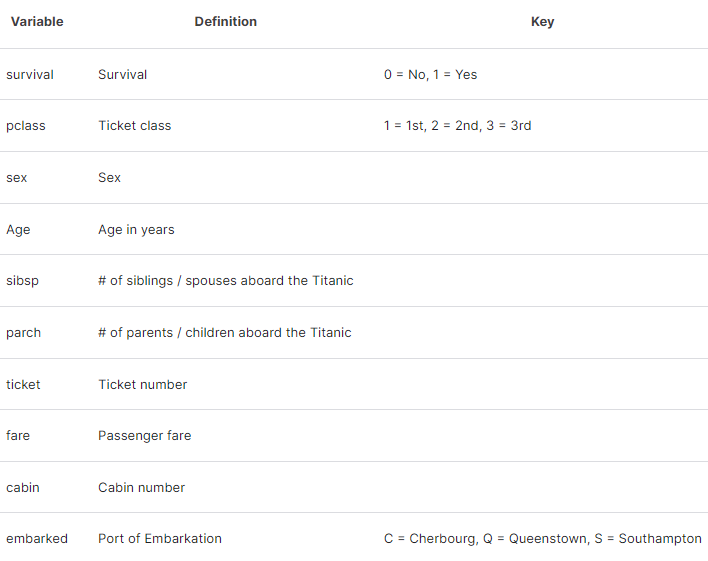

In [ ]:
# 변수명 검색
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**변수의 의미를 알고 가는것 중요 !!**

**PassengerId**: 탑승객의 고유 식별 번호.

**Survived**: 탑승객 생존 여부. 0/1로 이미 인코딩 되어 있음.

**Pclass**: 탑승객 티켓의 Class. 1~3등석까지 되어 있음.

**Name**: 탑승객의 이름.

**Sex**: 탑승객의 성별.

**Age**: 탑승객의 나이.

**SibSp**: 탑승객의 동승 배우자/형제자매 수

**Parch**: 탑승객의 동승 부모/자녀 수

**Ticket**: 티켓 번호

**Fare**: 승객 운임

**Cabin**: 선실 번호

**Embarked**: 승선 항구명 (C, Q, S)

## 2. 변수 정보 확인하기

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [ ]:
# 결측치 갯수 파악
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**Age, Fare, Cabin, Embarked**: 결측치 처리 필요

**Name, Sex, Ticket, Cabin, Embarked**: object -> 데이터 확인하고 수치형 데이터로 변환 고려

## 3. 결측치 처리하기

### Age의 경우

In [ ]:
#몇 개나 결측인지 확인
titanic_df['Age'].isnull().sum() # titanic_df['Age'].isna().sum()

263

In [ ]:
#결측치를 어떻게 채우면 좋을지 확인
titanic_df[titanic_df['Age'].isna()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


**가족 정보로 찾아보기**

In [ ]:
# 이름에서 성과 이름을 추출
titanic_df['LastName'] = titanic_df['Name'].apply(lambda x: x.split(',')[0].strip())
titanic_df['FirstNames'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].strip())

#### **titanic_df['Name'].apply(lambda x: x.split(',')[0].strip())**
- .strip():선택된 성의 앞뒤에 공백이 있을 경우 이를 제거
- .apply( ):apply 메소드는 데이터프레임의 시리즈 (열)에 대해 요소별로 함수를 적용하는데 사용

In [ ]:
titanic_df # 이름이 잘 구분되졌음을 알 수 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr. Woolf
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona. Fermina
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr. Simon Sivertsen
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr. Frederick


In [ ]:
# 결측값이 있는 승객의 성을 가진 그룹 추출 및 출력
na_last_names = titanic_df[titanic_df['Age'].isna()]['LastName'].unique()

for last_name in na_last_names:
    subset = titanic_df[titanic_df['LastName'] == last_name].iloc[:, :-2]
    if len(subset) > 1:
      print(subset.to_string(index=False))
      print("\n" + "="*80 + "\n")

 PassengerId Survived  Pclass                Name    Sex  Age  SibSp  Parch Ticket    Fare Cabin Embarked
           6        0       3    Moran, Mr. James   male  NaN      0      0 330877  8.4583   NaN        Q
         110        1       3 Moran, Miss. Bertha female  NaN      1      0 371110 24.1500   NaN        Q
         769        0       3 Moran, Mr. Daniel J   male  NaN      1      0 371110 24.1500   NaN        Q


 PassengerId Survived  Pclass                              Name  Sex  Age  SibSp  Parch   Ticket    Fare Cabin Embarked
          18        1       2      Williams, Mr. Charles Eugene male  NaN      0      0   244373 13.0000   NaN        S
         156        0       1       Williams, Mr. Charles Duane male 51.0      0      1 PC 17597 61.3792   NaN        C
         305        0       3 Williams, Mr. Howard Hugh "Harry" male  NaN      0      0 A/5 2466  8.0500   NaN        S
         736        0       3              Williams, Mr. Leslie male 28.5      0      0    546

**직접 검색하기**

In [ ]:
# 결측값이 있는 승객의 성을 가진 그룹 추출 및 출력
na_last_names = titanic_df[titanic_df['Age'].isna()]['LastName'].unique()

for last_name in na_last_names:
    subset = titanic_df[titanic_df['LastName'] == last_name].iloc[:, :-2]
    if len(subset) >= 1:
      print(subset.to_string(index=False))
      print("\n" + "="*80 + "\n")

 PassengerId Survived  Pclass                Name    Sex  Age  SibSp  Parch Ticket    Fare Cabin Embarked
           6        0       3    Moran, Mr. James   male  NaN      0      0 330877  8.4583   NaN        Q
         110        1       3 Moran, Miss. Bertha female  NaN      1      0 371110 24.1500   NaN        Q
         769        0       3 Moran, Mr. Daniel J   male  NaN      1      0 371110 24.1500   NaN        Q


 PassengerId Survived  Pclass                              Name  Sex  Age  SibSp  Parch   Ticket    Fare Cabin Embarked
          18        1       2      Williams, Mr. Charles Eugene male  NaN      0      0   244373 13.0000   NaN        S
         156        0       1       Williams, Mr. Charles Duane male 51.0      0      1 PC 17597 61.3792   NaN        C
         305        0       3 Williams, Mr. Howard Hugh "Harry" male  NaN      0      0 A/5 2466  8.0500   NaN        S
         736        0       3              Williams, Mr. Leslie male 28.5      0      0    546

https://www.encyclopedia-titanica.org/titanic-passenger-lists/

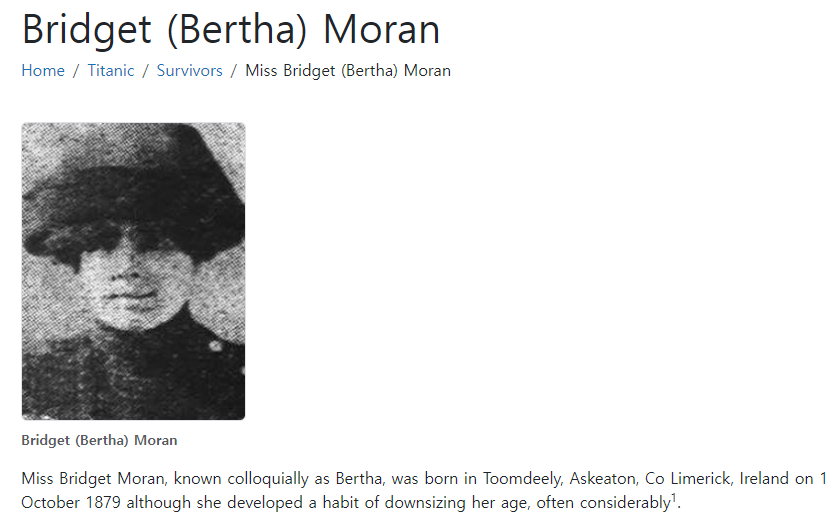

In [ ]:
# 결측치 채우기
titanic_df.loc[titanic_df['PassengerId']==110,'Age'] = 32

In [ ]:
# 확인하기
titanic_df.loc[titanic_df['PassengerId'] == 110 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
109,110,1,3,"Moran, Miss. Bertha",female,32.0,1,0,371110,24.15,NaN,Q,Moran,Miss. Bertha


**이름에서 힌트 얻기**

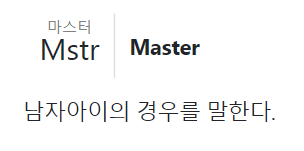

In [ ]:
# "Master" 호칭을 가진 승객들의 나이를 추출하여 중앙값을 계산
master_ages = titanic_df[titanic_df['Name'].str.contains('Master')]['Age']
median_master_age = master_ages.median()
median_master_age

4.0

In [ ]:
titanic_df[titanic_df['Name'].str.contains('Master') &titanic_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,Master. Gerios
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Master. Thomas Henry
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Master. Henry Forbes
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,"Master. Halim Gonios (""William George"")"
1135,1136,None,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Master. William Arthur Willie"""""
1230,1231,None,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,Betros,Master. Seman
1235,1236,None,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,van Billiard,Master. James William
1308,1309,None,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Peter,Master. Michael J


In [ ]:
# 결측치 채워 넣기
titanic_df.loc[titanic_df['Name'].str.contains('Master') & titanic_df['Age'].isna(), 'Age'] = median_master_age

In [ ]:
titanic_df[titanic_df['Name'].str.contains('Master') & titanic_df['Age']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Rice,Master. Eugene
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,Panula,Master. Juha Niilo
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,Goodwin,Master. William Frederick
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,Skoog,Master. Harald
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,1252,None,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,Sage,Master. William Henry
1270,1271,None,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S,Asplund,Master. Carl Edgar
1280,1281,None,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Paul Folke
1283,1284,None,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S,Abbott,Master. Eugene Joseph


### Fare의 경우

In [ ]:
# 결측치 확인
titanic_df[titanic_df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
1043,1044,None,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Storey,Mr. Thomas


Fare를 정하는 기준으로는 정박하는 곳은 어딘지(Embarked), 좌석 등급(Pclass), 동승자의 수(SibSp) 등이 영향을 미칠 것이므로 그룹화 해서 평균을 살펴볼 수 있다.

In [ ]:
titanic_df.groupby(['Embarked','Pclass','SibSp'])['Fare'].mean()

Embarked  Pclass  SibSp
C         1       0        100.913398
                  1        107.953752
                  2        262.375000
          2       0         15.770829
                  1         30.830357
          3       0          9.076094
                  1         14.004654
                  2         20.468750
Q         1       1         90.000000
                  2         90.000000
          2       0         11.735114
          3       0          8.290190
                  1         15.650000
                  2         23.250000
                  4         29.125000
S         1       0         55.168556
                  1         90.126233
                  2         65.577100
                  3        263.000000
          2       0         17.076553
                  1         27.661765
                  2         40.062500
                  3         21.000000
          3       0         10.060137
                  1         18.592684
                  2       

- 좌석 등급이 높을 수록 요금이 비싸다
- 동승자 수가 많을 수록 비싸다.

In [ ]:
titanic_df.groupby(['Embarked','Pclass','Parch'])['Fare'].mean()

Embarked  Pclass  Parch
C         1       0         90.593996
                  1        136.068300
                  2        165.549067
                  3        262.375000
          2       0         17.861295
                  1         37.004200
                  2         40.664200
          3       0          9.454463
                  1         14.889681
                  2         15.177767
                  3         19.258300
Q         1       0         90.000000
          2       0         11.735114
          3       0          9.237141
                  1         25.232143
                  2          7.750000
                  5         29.125000
S         1       0         55.666452
                  1         96.153791
                  2        145.214350
                  4        263.000000
          2       0         18.303792
                  1         26.829268
                  2         34.662500
                  3         26.916667
          3       0       

In [ ]:
mean_fare = titanic_df[(titanic_df['Pclass']==3) & (titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)& (titanic_df['Embarked']=='S')]['Fare'].mean()

In [ ]:
mean_fare

9.593713003095974

In [ ]:
titanic_df.loc[titanic_df['PassengerId'] == 1044, 'Fare'] = mean_fare

### Embarked의 경우

In [ ]:
# 결측치 확인
titanic_df[titanic_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,Miss. Amelie
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Mrs. George Nelson (Martha Evelyn)


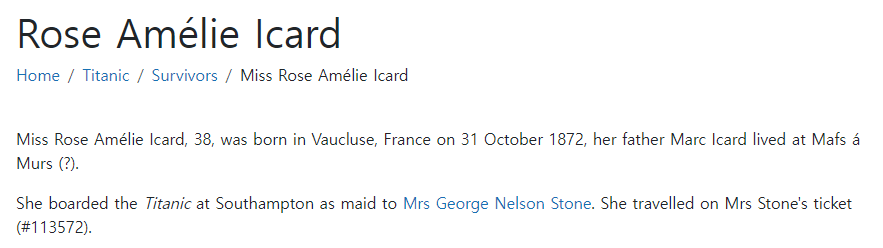

In [ ]:
titanic_df.loc[titanic_df['Embarked'].isna(),'Embarked'] ='S'

### Cabin의 경우

In [ ]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

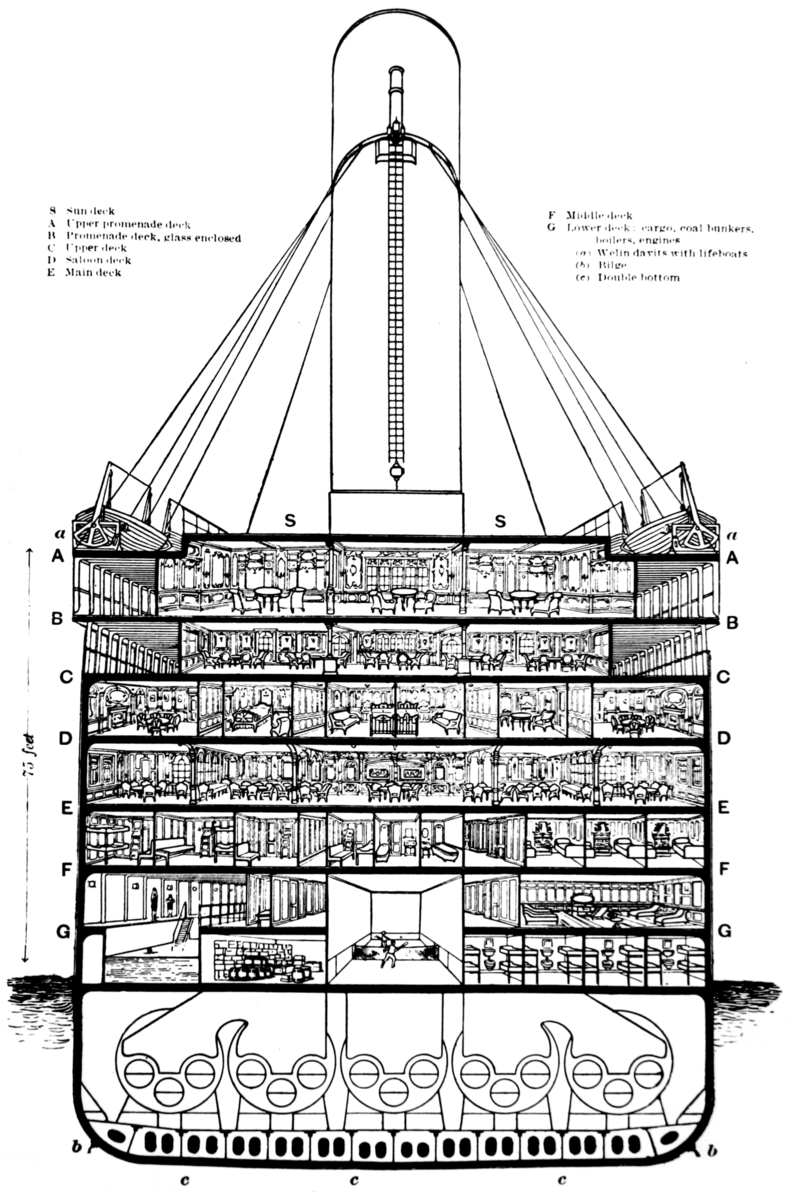

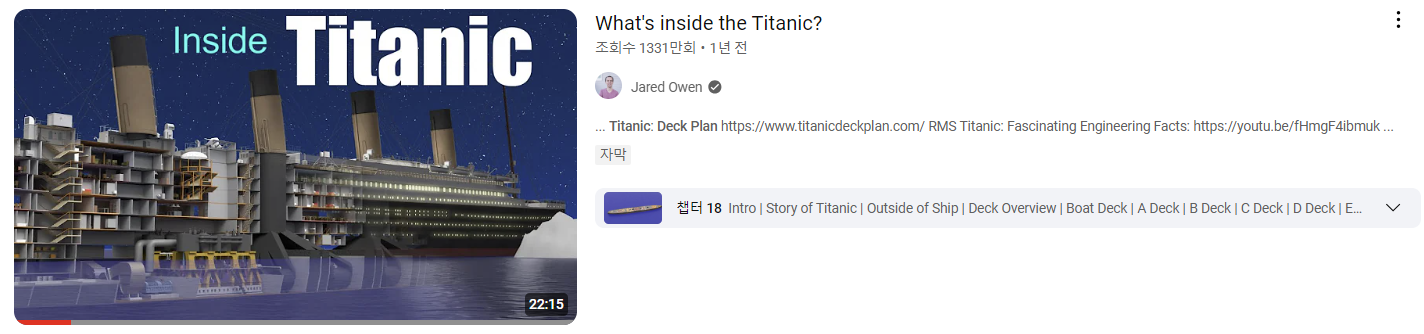

https://www.youtube.com/watch?v=HLrBUwNSEo0

https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str.extract('([A-Za-z]+)', expand=False)

expand=False: 추출된 값을 데이터프레임이 아닌 시리즈(Series)로 반환하도록 한다.

In [ ]:
titanic_df.groupby(['Cabin','Pclass'])['Survived'].mean()

Cabin  Pclass
A      1         0.466667
B      1         0.744681
C      1          0.59322
D      1         0.758621
       2             0.75
E      1             0.72
       2             0.75
       3              1.0
F      2            0.875
       3              0.2
G      3              0.5
T      1              0.0
Name: Survived, dtype: object

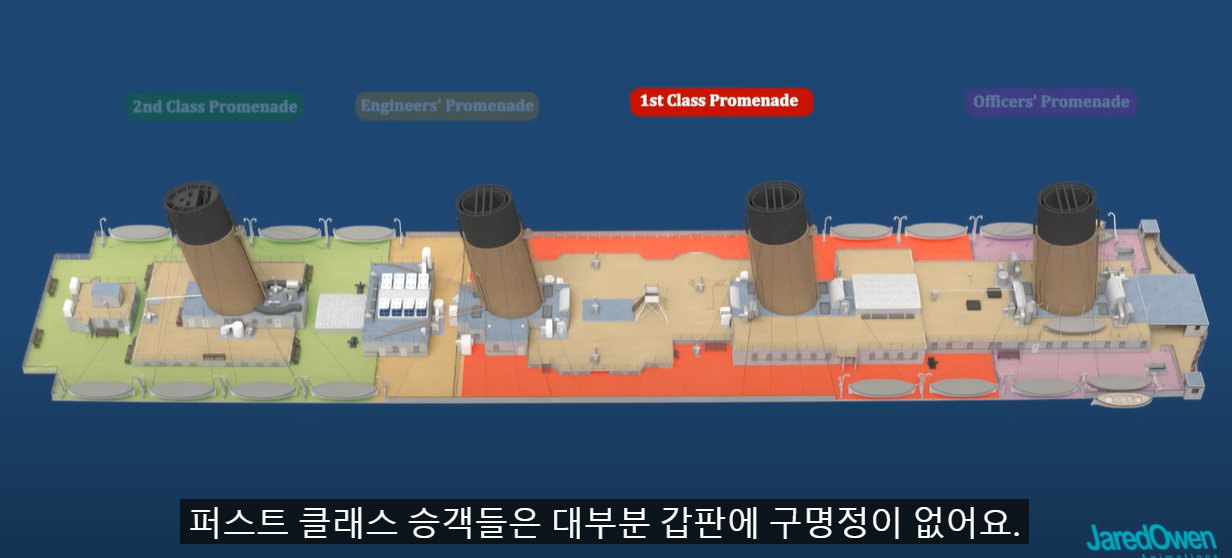

In [ ]:
titanic_df[titanic_df['Cabin'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Blackwell,Mr. Stephen Weart


https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html

In [ ]:
titanic_df[titanic_df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,None,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,Henriksson,Miss. Jenny Lovisa
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr. Woolf
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr. Simon Sivertsen
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr. Frederick


## **ChatGPT 이용해서 결측치 채워넣어 보기**
- titanic_df 에서 결측치를 채우려고 하는데, Cabin열을 다음과 같이 채우고 싶어. 각 승객의 Ticket(Ticket번호)를 가지고 , Ticket열의 값이 일치하는 사람들에 대해서 그 사람들의 Cabin열이 만약에 존재한다면 그것으로 채우게 하고 싶어. 파이썬 코드로 알려줘

In [ ]:
# 'Ticket' 값이 같은 그룹을 찾음
ticket_groups = titanic_df.groupby('Ticket')

# 각 그룹 내에서 'Cabin' 값이 존재하는 첫 번째 값을 찾아서 결측치를 채움
def fill_cabin(group):
    # 그룹 내에서 'Cabin' 값이 존재하는 경우 해당 값으로 결측치 채움
    cabin_value = group['Cabin'].dropna().unique()
    if len(cabin_value) > 0:
        group['Cabin'] = group['Cabin'].fillna(cabin_value[0])
    return group

# 각 그룹에 대해 결측치 채우기
titanic_df = ticket_groups.apply(fill_cabin).reset_index(drop=True)

In [ ]:
titanic_df.iloc[[0, 2, 4]] # 결측치가 잘 채워졌음을 알 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstNames
0,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B,S,Cherry,Miss. Gladys
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B,S,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards)
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E,S,Taussig,Mrs. Emil (Tillie Mandelbaum)


## 4. 수치형 데이터로 변환하기

### Sex의 경우

In [ ]:
titanic_df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# map을 이용해 대응하기
titanic_df['Sex'] = titanic_df['Sex'].map({'male':1, 'female':0})

In [ ]:
titanic_df['Sex'].unique() # 0,1만 존재함으로 잘 변환이 되었음을 알 수 있음.

array([0, 1])

### Embarked의 경우

In [ ]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# 'Embarked' 열에 대해 원-핫 인코딩 수행
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], prefix='Embarked')

- pd.get_dummies():판다스의 get_dummies 함수는 범주형 변수를 원-핫 인코딩으로 변환합니다.
- columns=['Embarked']:'Embarked' 열에 대해 원-핫 인코딩을 수행합니다.
- prefix='Embarked':생성될 원-핫 인코딩 열의 접두사(prefix)를 지정합니다. 각 새 열의 이름은 'Embarked_'로 시작합니다.

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,LastName,FirstNames,Embarked_C,Embarked_Q,Embarked_S
0,258,1,1,"Cherry, Miss. Gladys",0,30.0,0,0,110152,86.500,B,Cherry,Miss. Gladys,False,False,True
1,505,1,1,"Maioni, Miss. Roberta",0,16.0,0,0,110152,86.500,B,Maioni,Miss. Roberta,False,False,True
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33.0,0,0,110152,86.500,B,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),False,False,True
3,263,0,1,"Taussig, Mr. Emil",1,52.0,1,1,110413,79.650,E,Taussig,Mr. Emil,False,False,True
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",0,39.0,1,1,110413,79.650,E,Taussig,Mrs. Emil (Tillie Mandelbaum),False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,93,0,1,"Chaffee, Mr. Herbert Fuller",1,46.0,1,0,W.E.P. 5734,61.175,E,Chaffee,Mr. Herbert Fuller,False,False,True
1305,906,None,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.175,E,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),False,False,True
1306,220,0,2,"Harris, Mr. Walter",1,30.0,0,0,W/C 14208,10.500,NaN,Harris,Mr. Walter,False,False,True
1307,541,1,1,"Crosby, Miss. Harriet R",0,36.0,0,2,WE/P 5735,71.000,B,Crosby,Miss. Harriet R,False,False,True


In [ ]:
# .astype(int): int로 타입 변환
titanic_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = titanic_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,LastName,FirstNames,Embarked_C,Embarked_Q,Embarked_S
0,258,1,1,"Cherry, Miss. Gladys",0,30.0,0,0,110152,86.500,B,Cherry,Miss. Gladys,0,0,1
1,505,1,1,"Maioni, Miss. Roberta",0,16.0,0,0,110152,86.500,B,Maioni,Miss. Roberta,0,0,1
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33.0,0,0,110152,86.500,B,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),0,0,1
3,263,0,1,"Taussig, Mr. Emil",1,52.0,1,1,110413,79.650,E,Taussig,Mr. Emil,0,0,1
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",0,39.0,1,1,110413,79.650,E,Taussig,Mrs. Emil (Tillie Mandelbaum),0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,93,0,1,"Chaffee, Mr. Herbert Fuller",1,46.0,1,0,W.E.P. 5734,61.175,E,Chaffee,Mr. Herbert Fuller,0,0,1
1305,906,None,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.175,E,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),0,0,1
1306,220,0,2,"Harris, Mr. Walter",1,30.0,0,0,W/C 14208,10.500,NaN,Harris,Mr. Walter,0,0,1
1307,541,1,1,"Crosby, Miss. Harriet R",0,36.0,0,2,WE/P 5735,71.000,B,Crosby,Miss. Harriet R,0,0,1


## 5. 새로운 변수 생성하기

In [ ]:
import re

# 타이틀을 추출하는 함수
def extract_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return None

# 타이틀 추출
titanic_df['Title'] = titanic_df['Name'].apply(extract_title)

In [ ]:
titanic_df['Title'].unique()

array(['Miss', 'Countess', 'Mr', 'Mrs', 'Dr', 'Major', 'Master', 'Col',
       'Lady', 'Jonkheer', 'Rev', 'Ms', 'Mme', 'Mlle', 'Sir', 'Don',
       'Dona', 'Capt'], dtype=object)

Jonkheer: 귀족 중 가장 낮은 계급

Lady: 귀족 미혼 여성

Countess: 백작 부인 / 미망인

Capt: 대위

Col: 대령

Major: 소령

Dr: 의사

Rev: 목사

Don: 대학 강사

Mlle: 마드모아젤의 약어 (미혼 여성에 대한 경칭)

MMe: 마담의 약어 (기혼 여성에 대한 존칭)

Dona: 기혼 여성을 부르는 존칭

Sir: 경 (남성을 부르는 존칭)

Ms / Miss: 미혼 여성

Mrs: 기혼 여성

Mr: 남성

Master: 어린 남자 아이


In [ ]:
titanic_df.groupby('Title')['Pclass'].mean()

Title
Capt        1.000000
Col         1.000000
Countess    1.000000
Don         1.000000
Dona        1.000000
Dr          1.250000
Jonkheer    1.000000
Lady        1.000000
Major       1.000000
Master      2.655738
Miss        2.346154
Mlle        1.000000
Mme         1.000000
Mr          2.381770
Mrs         1.939086
Ms          2.500000
Rev         2.000000
Sir         1.000000
Name: Pclass, dtype: float64

In [ ]:
titanic_df.groupby('Title')['PassengerId'].count()

Title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
Name: PassengerId, dtype: int64

In [ ]:
titanic_df.groupby('Title')['Survived'].mean()

Title
Capt             0.0
Col              0.5
Countess         1.0
Don              0.0
Dona             NaN
Dr          0.428571
Jonkheer         0.0
Lady             1.0
Major            0.5
Master         0.575
Miss        0.697802
Mlle             1.0
Mme              1.0
Mr          0.156673
Mrs            0.792
Ms               1.0
Rev              0.0
Sir              1.0
Name: Survived, dtype: object

## 6. 정리하기

In [ ]:
# 필요없는 열 제거
titanic_df.drop(['FirstNames','LastName','Ticket'],axis=1, inplace=True)

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,258,1,1,"Cherry, Miss. Gladys",0,30.0,0,0,86.500,B,0,0,1,Miss
1,505,1,1,"Maioni, Miss. Roberta",0,16.0,0,0,86.500,B,0,0,1,Miss
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33.0,0,0,86.500,B,0,0,1,Countess
3,263,0,1,"Taussig, Mr. Emil",1,52.0,1,1,79.650,E,0,0,1,Mr
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",0,39.0,1,1,79.650,E,0,0,1,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,93,0,1,"Chaffee, Mr. Herbert Fuller",1,46.0,1,0,61.175,E,0,0,1,Mr
1305,906,None,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,61.175,E,0,0,1,Mrs
1306,220,0,2,"Harris, Mr. Walter",1,30.0,0,0,10.500,NaN,0,0,1,Mr
1307,541,1,1,"Crosby, Miss. Harriet R",0,36.0,0,2,71.000,B,0,0,1,Miss


In [ ]:
# excel로 저장
titanic_df.to_excel('titanic_preprocessed.xlsx')

# **과제**


1. 위에 있는 실습 코드를 채워 넣어주세요. (만점 80점으로 정성 평가. 다 채워넣었으면 기본적으로 만점)

2. kaggle API를 이용해 titanic 데이터가 아닌 본인이 관심 있는 다른 데이터를 불러와서 저장하고 업로드 해주세요. (코드 10점, 저장된 파일 업로드 시 10점) 아래 예제 코드를 참조해서 적절하게 본인의 데이터를 불러올 수 있도록 코드를 바꿔주세요.

In [ ]:
# Kaggle API를 사용하여 데이터 다운로드
!pip install kaggle

# Kaggle API 인증 파일 업로드
from google.colab import files
files.upload()

# Kaggle API 인증
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드
!kaggle competitions download -c house-prices-advanced-regression-techniques

# 압축 해제
!unzip house-prices-advanced-regression-techniques.zip

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")

test_df = pd.read_csv("test.csv")

# test_df에 SalePrice 컬럼을 추가하고 NaN 값으로 채움
test_df['SalePrice'] = None

# 두 데이터프레임을 결합
house_df = pd.concat([train_df, test_df], ignore_index=True)

# 엑셀 파일로 저장
house_df.to_excel('house_df.xlsx')

### titanic dataset이 아닌 다른 dataset 불러오기

In [ ]:
# Kaggle API를 사용하여 데이터 다운로드
!pip install kaggle

# Kaggle API 인증 파일 업로드
from google.colab import files
files.upload()

# Kaggle API 인증
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 2018 Kaggle Machine Learning & Data Science Survey 데이터셋
# 데이터셋 다운로드
!kaggle datasets download -d kaggle/kaggle-survey-2017

# 압축 해제
!unzip kaggle-survey-2017.zip

Saving kaggle.json to kaggle (3).json
Dataset URL: https://www.kaggle.com/datasets/kaggle/kaggle-survey-2017
License(s): ODbL-1.0
  0% 0.00/3.52M [00:00<?, ?B/s]
100% 3.52M/3.52M [00:00<00:00, 158MB/s]
Archive:  kaggle-survey-2017.zip
  inflating: RespondentTypeREADME.txt  
  inflating: conversionRates.csv     
  inflating: freeformResponses.csv   
replace multipleChoiceResponses.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: multipleChoiceResponses.csv  
  inflating: schema.csv              


In [ ]:
import pandas as pd

# schema는 multipleChoiceResponses.csv 및 freeforeResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있음
question=pd.read_csv("schema.csv")
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [ ]:
mcq=pd.read_csv("multipleChoiceResponses.csv",encoding="ISO-8859-1",low_memory=False)
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**보너스 (20점)**

해당 데이터에 대해서 간단한 전처리를 수행해주세요.

채점 기준:

1. 변수 의미에 대해 파악하는 과정이 있고, 의미에 근거하여 전처리가 수행되고 있는가? (5점 만점으로 정성 평가)

2. 전처리 수행 과정이 체계적인가? (5점 만점으로 정성 평가)

3. 전처리 수행 결과에 의도와 다른 결함이 없는가? (5점 만점으로 정성 평가)

4. 전처리 수행 결과 파일을 첨부했는가? (5점 만점)

In [ ]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [ ]:
mcq['Country'].unique()

array([nan, 'United States', 'Canada', 'Taiwan', 'Brazil', 'India',
       'Australia', 'Russia', 'Netherlands', 'Italy', 'United Kingdom',
       'Czech Republic', 'Colombia', 'Germany', 'Denmark', 'Poland',
       'South Africa', 'Sweden', 'Portugal', 'Other', 'Mexico',
       'New Zealand', "People 's Republic of China", 'Japan', 'Iran',
       'Singapore', 'France', 'Spain', 'Indonesia', 'Israel', 'Egypt',
       'Hungary', 'Argentina', 'Turkey', 'Ukraine', 'Greece', 'Pakistan',
       'Finland', 'Norway', 'Ireland', 'Chile', 'Belarus', 'Malaysia',
       'South Korea', 'Nigeria', 'Belgium', 'Hong Kong',
       'Republic of China', 'Philippines', 'Vietnam', 'Kenya',
       'Switzerland', 'Romania'], dtype=object)

### 설문조사에 응답한 여러나라의 캐글러들 중에서 인터뷰에 응한 우리나라 캐글러들의 특징에 대해 파악해보고자 한다.

In [ ]:
korea=mcq.loc[(mcq['Country']=='South Korea')]
korea.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
356,Male,South Korea,27.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
491,Male,South Korea,34.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,Very Important,Not important,Not important,Not important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Not important


### **현재 배운것을 적용해보기 위해 임의로 몇개의 열만 사용할 것이다.**
- GenderSelect: 응답자의 성별
- Age: 응답자의 나이
- Country: 응답자의 출신국가 ( 한국사람만 추출함)
- EmploymentStatus: 고용상태로 어떠한 형식으로 일하는 중인지를 나타냄
- StudentStatus: 학생인지 아닌지를 나타냄
- CareerSwitcher: 직업 전환여부

In [ ]:
# 필요한 열만 선택하여 새로운 데이터프레임 생성
selected_columns = ['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus', 'CareerSwitcher']
df = korea[selected_columns]
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,CareerSwitcher
356,Male,South Korea,27.0,Employed full-time,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,Yes
491,Male,South Korea,34.0,Employed part-time,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,Yes


In [ ]:
# 결측치 갯수 확인
df.isna().sum()

GenderSelect          0
Country               0
Age                   3
EmploymentStatus      0
StudentStatus       174
CareerSwitcher      156
dtype: int64

### Age에 대한 결측치 처리

In [ ]:
# 결측치 있는 행 확인
df[df['Age'].isna()]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,CareerSwitcher
1922,Male,South Korea,NaN,I prefer not to say,Yes,NaN
13946,Male,South Korea,NaN,Employed full-time,NaN,NaN
14599,Male,South Korea,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN


In [ ]:
# 'GenderSelect'가 'Male'인 데이터를 'Age' 열로 그룹화하여 각 그룹의 개수를 계산
age_group_counts = df[df['GenderSelect'] == 'Male'].groupby('Age')['Age'].count()

print(age_group_counts)

Age
19.0     2
20.0     1
21.0     2
22.0     1
23.0     5
24.0     6
25.0    16
26.0    15
27.0    13
28.0     4
29.0     7
30.0     7
31.0     5
32.0     7
33.0     2
34.0     5
35.0     5
36.0     2
37.0     1
38.0     9
39.0     3
40.0     4
41.0     3
42.0     4
43.0     3
44.0     2
45.0     4
46.0     5
47.0     1
48.0     3
49.0     1
53.0     1
56.0     1
57.0     1
59.0     1
62.0     1
Name: Age, dtype: int64


In [ ]:
# 남자 평균 나이
# 'GenderSelect'가 'Male'인 데이터의 'Age' 열의 평균을 계산
male_average_age = df[df['GenderSelect'] == 'Male']['Age'].mean()

print(male_average_age)

32.745098039215684


- 남성 응답자들의 나이 분포를 보면 20대 후반부터 30대 초반이 가장 많이 응답하여 결측치를 평균 나이로 대체하고자 한다.
- "남성"으로 특정한 이유는 나이 결측치 행을 보았을때 남자만 있었음으로 남자 나이의 평균으로 대체하고자 한다.

In [ ]:
# 'GenderSelect'가 'Male'이고 'Age' 열이 결측치인 경우 평균 값으로 대체
df.loc[(df['GenderSelect'] == 'Male') & (df['Age'].isna()), 'Age'] = male_average_age
df['Age'].isna().sum()

0

### StudentStatus에 대한 결측치 처리

In [ ]:
df['StudentStatus'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
df[df['StudentStatus'].isna()]['EmploymentStatus'].value_counts()

EmploymentStatus
Employed full-time                                      116
Not employed, but looking for work                       34
Independent contractor, freelancer, or self-employed     13
Employed part-time                                        7
Not employed, and not looking for work                    2
I prefer not to say                                       1
Retired                                                   1
Name: count, dtype: int64

- StudentStatus에 대해 결측치를 가진 대부분의 데이터들이 풀타임으로 일하고 있음으로 결측치에 대해 'NO'라고 채우고자 한다.

In [ ]:
# 결측치에 대해 'No'라고 채우기
df['StudentStatus']= df['StudentStatus'].fillna('No')

<ipython-input-190-765233479911>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StudentStatus']= df['StudentStatus'].fillna('No')


In [ ]:
df['StudentStatus'].unique()

array(['No', 'Yes'], dtype=object)

### CareerSwitch에 대한 결측치 처리

In [ ]:
df['CareerSwitcher'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
df[df['CareerSwitcher'].isna()][['StudentStatus','EmploymentStatus']].value_counts()

StudentStatus  EmploymentStatus                                    
No             Employed full-time                                      81
               Not employed, but looking for work                      34
               Independent contractor, freelancer, or self-employed    12
Yes            Not employed, and not looking for work                  10
No             Employed part-time                                       6
Yes            I prefer not to say                                      6
No             Not employed, and not looking for work                   5
               I prefer not to say                                      2
Name: count, dtype: int64

In [ ]:
df[df['CareerSwitcher'].isna()].groupby(['StudentStatus', 'EmploymentStatus']).size()

StudentStatus  EmploymentStatus                                    
No             Employed full-time                                      81
               Employed part-time                                       6
               I prefer not to say                                      2
               Independent contractor, freelancer, or self-employed    12
               Not employed, and not looking for work                   5
               Not employed, but looking for work                      34
Yes            I prefer not to say                                      6
               Not employed, and not looking for work                  10
dtype: int64

- CareerSwitcher에 대해 결측치를 가진 대부분의 데이터들이 풀타임으로 일하고 있음으로 결측치에 대해 'No'라고 채우고자 한다.

In [ ]:
# 'CareerSwitcher' 열의 결측치를 'No'로 채우기
df['CareerSwitcher'].fillna('No', inplace=True)

<ipython-input-195-e83e2f5192c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CareerSwitcher'].fillna('No', inplace=True)


In [ ]:
df.isna().sum() # 결측치 처리 완료

GenderSelect        0
Country             0
Age                 0
EmploymentStatus    0
StudentStatus       0
CareerSwitcher      0
dtype: int64

#### **StudentStatus와 CareerSwitcher 둘다 Yes,No의 응답으로 이루어진 데이터들이기에 둘중 하나는 인코딩 하고자한다.**

In [ ]:
# 'CareerSwitcher' 열을 One-Hot Encoding
df=pd.get_dummies(df,columns=['CareerSwitcher'], prefix='CareerSwitcher')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,CareerSwitcher_No,CareerSwitcher_Yes
356,Male,South Korea,27.0,Employed full-time,No,True,False
363,Female,South Korea,36.0,Employed full-time,No,False,True
491,Male,South Korea,34.0,Employed part-time,No,True,False
565,Male,South Korea,53.0,Employed full-time,No,True,False
601,Male,South Korea,35.0,Employed full-time,No,False,True


In [ ]:
# .astype(int): int로 타입 변환
df[['CareerSwitcher_No','CareerSwitcher_Yes']] = df[['CareerSwitcher_No','CareerSwitcher_Yes']].astype(int)
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,CareerSwitcher_No,CareerSwitcher_Yes
356,Male,South Korea,27.0,Employed full-time,No,1,0
363,Female,South Korea,36.0,Employed full-time,No,0,1
491,Male,South Korea,34.0,Employed part-time,No,1,0
565,Male,South Korea,53.0,Employed full-time,No,1,0
601,Male,South Korea,35.0,Employed full-time,No,0,1


- 해당 데이터를 이용해서 설문조사에 응한 한국 캐글러들의 특징을 파악해볼 수 있을것이다.

In [ ]:
# 데이터 추출
df.to_excel('kaggle_korea_survey.xlsx')